<h3>Import Statements</h3>

In [16]:
import os

os.system(f"pip install -r {os.path.abspath(os.getcwd())}/requirements.txt")

ERROR: Could not open requirements file: [Errno 2] No such file or directory: '/Users/valentina/Documents/GitHub/AFFP/src/model/requirements.txt'


256

In [17]:
import tensorflow as tf
import numpy as np
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt

from datasets import dataset

<h3>Loading in training data</h3>

In [18]:
temp_train = np.asarray(dataset['Temperature'])
rh_train = np.asarray(dataset['RH'])
wind_train = np.asarray(dataset['Ws'])
rain_train = np.asarray(dataset['Rain'])

### Obtaining the x_train and y_train data ###

In [19]:
xData = np.column_stack((temp_train, rh_train, wind_train, rain_train))
yData = np.asarray(dataset['Classes'].apply(lambda x: 1 if x == 'fire' else 0))

x_train, x_test, y_train, y_test = train_test_split(xData, yData, test_size=0.25)

### Defining model layers and creating the model ###

In [20]:
input_shape = x_train.shape[1:]
inputs = Input(shape=input_shape)
x = Dense(32, activation='relu', kernel_regularizer='l1')(inputs)
x = Dropout(0.2)(x)
x = Dense(16, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = Model(inputs=inputs, outputs=outputs)

### Define the optimizer

In [21]:
optimizer = tf.keras.optimizers.Adam(
	learning_rate=0.001,
	beta_1=0.9,
	beta_2=0.999,
	epsilon=1e-07
)

### Define the early stopping criteria

In [22]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

### Compiling, training, and evaluating the model

In [23]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0) # Verbose = 0 for minimal output
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/100
5/5 [==============================] - 1s 54ms/step - loss: 14.6829 - accuracy: 0.0137 - val_loss: 13.7994 - val_accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 10ms/step - loss: 11.4324 - accuracy: 0.0274 - val_loss: 11.4588 - val_accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 9ms/step - loss: 9.1879 - accuracy: 0.0616 - val_loss: 8.9755 - val_accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 9ms/step - loss: 5.6834 - accuracy: 0.1301 - val_loss: 6.2278 - val_accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 9ms/step - loss: 4.1482 - accuracy: 0.3014 - val_loss: 2.9395 - val_accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 9ms/step - loss: 1.7601 - accuracy: 0.5342 - val_loss: 0.4786 - val_accuracy: 1.0000
Epoch 7/100
5/5 [==============================] - 0s 9ms/step - loss: 0.7009 - accuracy: 0.7603 - val_loss: 0.2362 - val_accuracy: 1.0000
E

### Visualizing results

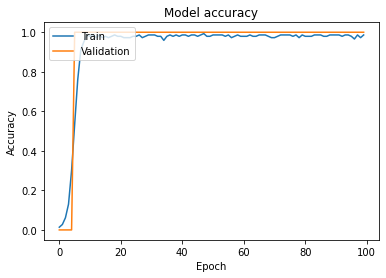

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()